### Get brightness temperature map for Ft. McMurray

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/aqua_136_2015.jpg
writing to: aqua_136_2015.jpg

aqua_136_2015.jpg already exists
and is 609787 bytes
will not overwrite



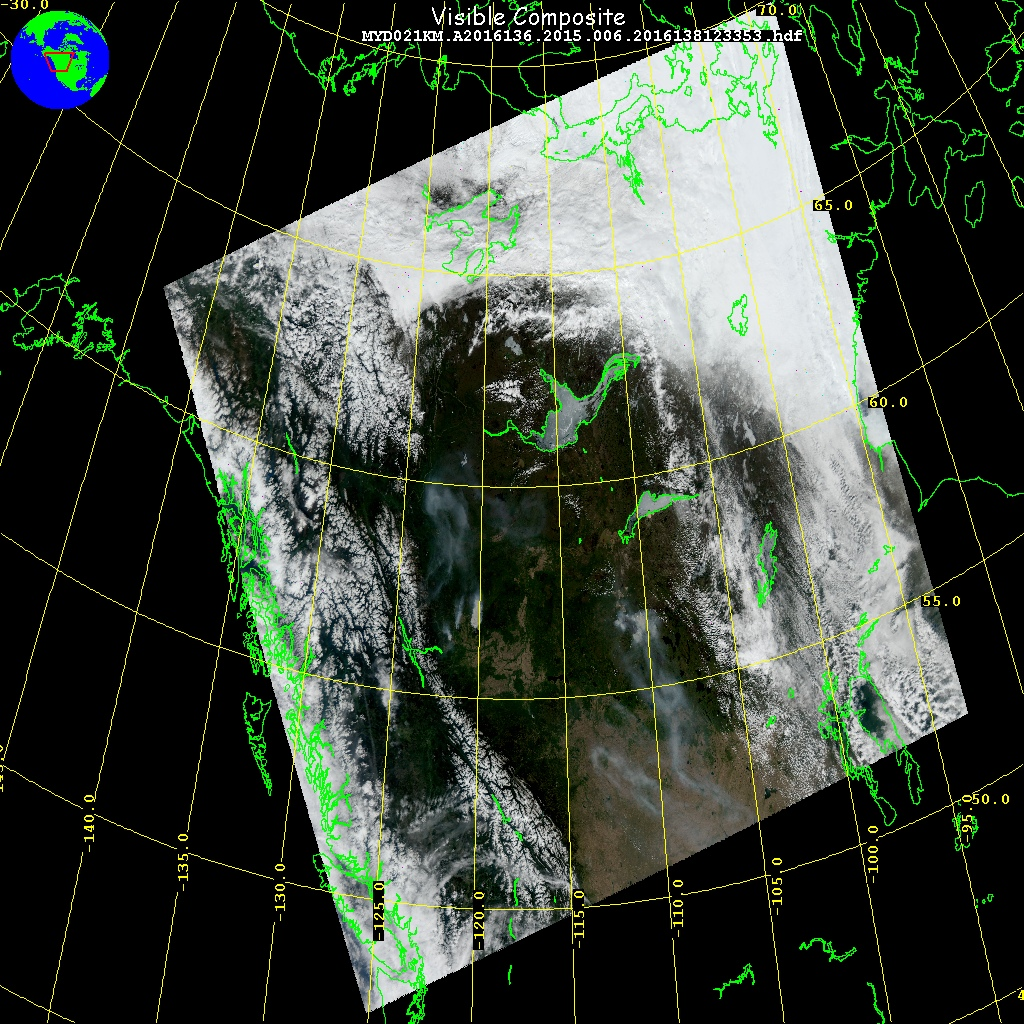

In [1]:
from e582utils.data_read import download
import numpy as np
import h5py
import sys
import warnings
from matplotlib import pyplot as plt
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from e582lib.radiation import planckInvert
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
download('aqua_136_2015.jpg')
Image('aqua_136_2015.jpg',width=800)

In [2]:
myd02file = 'MYD021KM.A2016136.2015.006.2016138123353.h5'
download(myd02file)
myd03file='MYD03.A2016136.2015.006.2016138121537.h5'
download(myd03file)

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/MYD021KM.A2016136.2015.006.2016138123353.h5
writing to: MYD021KM.A2016136.2015.006.2016138123353.h5

MYD021KM.A2016136.2015.006.2016138123353.h5 already exists
and is 155338872 bytes
will not overwrite

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/MYD03.A2016136.2015.006.2016138121537.h5
writing to: MYD03.A2016136.2015.006.2016138121537.h5

MYD03.A2016136.2015.006.2016138121537.h5 already exists
and is 41848985 bytes
will not overwrite



In [3]:
from e582lib.modis_reproject import modisl1b_resample, write_h5
from e582lib.modis_reproject import make_projectname
chan_list=['31']
result_dict=\
       modisl1b_resample(myd02file,myd03file,chan_list)

index and mean 0 7.276303291320801
running modisl1b_resample: here are the channels to be resampled
channel and mean 31 6.854452610015869
pyresample area_def information:

dump area definition:
Area ID: granule
Name: modis swath 5min granule
Projection ID: laea
Projection: {'datum': 'WGS84', 'lat_0': '58.75', 'lon_0': '-118.25', 'proj': 'laea', 'units': 'm'}
Number of columns: 2327
Number of rows: 2090
Area extent: (-1296437.7441421314, -1249531.9506374167, 1728684.3829633493, 1467858.1792684665)


x and y pixel dimensions in meters:
1300.0095088549554
1300.1866650267384

completed modisl1b_resample


In [4]:
result_dict.keys()

dict_keys(['channels', 'area_def_args', 'basemap_args', 'geotiff_args', 'fill_value'])

In [5]:
chan31=result_dict['channels'][:,:,0]

{'orientation': 'horizontal', 'ticklocation': 'bottom'}


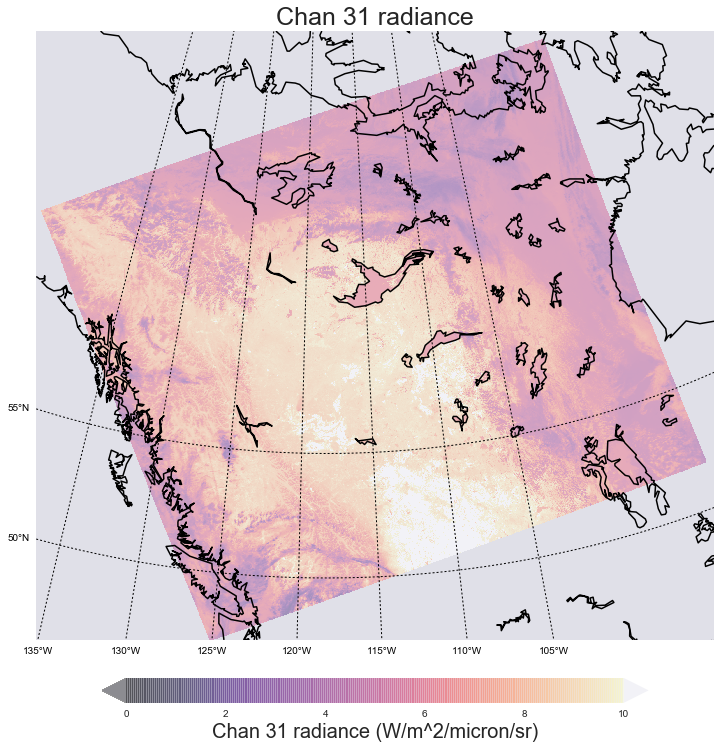

In [6]:
vmin=0
vmax=10.
cmap=cm.get_cmap('magma')
cmap.set_over('w')
cmap.set_under('k',alpha=0.8)
cmap.set_bad('k',alpha=0.1)
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)

masked_chan31 = np.ma.masked_invalid(chan31)
fig,ax=plt.subplots(1,1,figsize=(14,14))
basemap_args=result_dict['basemap_args']
basemap_args['ax']=ax
basemap_args['resolution']='l'
bmap=Basemap(**basemap_args)
lat_sep,lon_sep= 5,5
parallels = np.arange(30, 60, lat_sep)
meridians = np.arange(-135, -100, lon_sep)
bmap.drawparallels(parallels, labels=[1, 0, 0, 0],
                       fontsize=10, latmax=90)
bmap.drawmeridians(meridians, labels=[0, 0, 0, 1],
                       fontsize=10, latmax=90)
bmap.drawcoastlines(linewidth=1.5, linestyle='solid', color='k')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    col = bmap.imshow(masked_chan31,origin='upper', norm=the_norm,cmap=cmap,alpha=0.4)
    cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
    out=fig.colorbar(col,cax=cax,extend='both',**kw)
    out.set_label('Chan 31 radiance (W/m^2/micron/sr)',size=20)
    ax.set_title('Chan 31 radiance',size=25)
    print(kw)

In [7]:
wavel=11.e-6  #chan 31 central wavelength, meters
chan31_mks = result_dict['channels'][:,:,0]*1.e6  #W/m^2/m/sr
Tbright = planckInvert(wavel,chan31_mks)
Tbright = Tbright - 273.15 #convert to Centigrade


{'orientation': 'horizontal', 'ticklocation': 'bottom'}


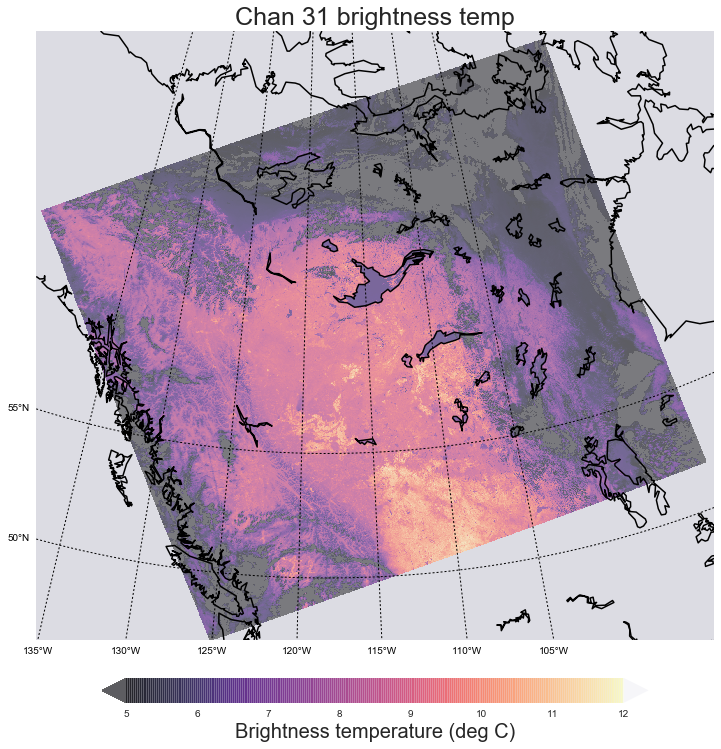

In [8]:
vmin=5
vmax=12
cmap=cm.get_cmap('magma')
cmap.set_over('w')
cmap.set_under('k',alpha=0.8)
cmap.set_bad('k',alpha=0.1)
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)

masked_chan31 = np.ma.masked_invalid(chan31)
fig,ax=plt.subplots(1,1,figsize=(14,14))
basemap_args=result_dict['basemap_args']
basemap_args['ax']=ax
basemap_args['resolution']='l'
bmap=Basemap(**basemap_args)
lat_sep,lon_sep= 5,5
parallels = np.arange(30, 60, lat_sep)
meridians = np.arange(-135, -100, lon_sep)
bmap.drawparallels(parallels, labels=[1, 0, 0, 0],
                       fontsize=10, latmax=90)
bmap.drawmeridians(meridians, labels=[0, 0, 0, 1],
                       fontsize=10, latmax=90)
bmap.drawcoastlines(linewidth=1.5, linestyle='solid', color='k')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    col = bmap.imshow(masked_chan31,origin='upper', norm=the_norm,cmap=cmap,alpha=0.6)
    cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
    out=fig.colorbar(col,cax=cax,extend='both',**kw)
    out.set_label('Brightness temperature (deg C)',size=20)
    ax.set_title('Chan 31 brightness temp',size=25)
    print(kw)